# A1 

The Markov chain has an initial "burn in" <https://www.youtube.com/watch?v=yCv2N7wGDCw> period after which it produces meaningful samples.

It takes more number of iterations to converge to the mean

In [2]:
using Distributions
using Plots
using StatsPlots
using Statistics
using Random
using StatsBase

In [3]:
Random.seed!(50)

TaskLocalRNG()

# A2

a.

$q(\Theta,y) \propto f(y|\mu,\nu)f(\mu|\nu)f(\nu)$ where $\Theta = (\mu,\nu)$

Joint posterior distribution is

$q(\Theta,y) \propto \displaystyle{\prod_{i=0}^{n}\left[\frac{1}{\sqrt{2\pi}}exp\left(-\frac{(y_{i}-\mu)^2}{2}\right)\right].\frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\sqrt{\nu\pi}\Gamma\left(\frac{\nu}{2}\right)}\left(1+\frac{\mu^{2}}{\nu}\right)^{\frac{-1-\nu}{2}}.\frac{b_0^{a_0}}{\Gamma(a_0)}\nu^{a_0-1}e^{-b_0\nu}.I(\nu>2)}$

$q(\Theta,y) \propto \displaystyle{\prod_{i=0}^{n}\left[exp\left(-\frac{(y_i-\mu)^2}{2}\right)\right].\left(1+\frac{\mu^2}{\nu}\right).\nu^{a_0-1}.e^{-b_0\nu}}$

In [4]:
a=2
b=0.1
n=100
N=10000

10000

In [5]:
nu = rand(truncated(Gamma(a,b),2,Inf))
mu = rand(TDist(nu))
y=rand(Normal(mu,1),n)

100-element Vector{Float64}:
  0.4429127813483884
  0.9756506659411274
  1.3719792094794152
  0.7986477694021488
 -1.239276235592909
 -0.19029795073371636
  0.6667763813456835
  0.3742089894298119
 -1.041149379883091
  0.4309846347094774
  0.017509596342879574
  1.426105309790154
  1.3841803669476067
  ⋮
 -0.06086576876329286
  1.3791051957513143
  1.7917717471548928
  1.223849342233243
  0.5707894154729283
  0.2785306219250243
  2.738753514162897
  1.6636653189514337
  0.1921989463966321
  0.31900016356612687
  1.508318418910508
 -0.26819206244354765

In [6]:
function posterior(mu)
    normal_samples = zeros(n)
    tdist_gamma = (1+(mu^2)/nu)*(nu^(a-1))*exp(-1*b*nu)
    for i in 1:n
        normal_samples[i] = tdist_gamma*exp(-1*((y[i]-mu^2)/2))
    end
    return normal_samples    
end

posterior (generic function with 1 method)

In [7]:
#Let’s choose proposal distribution be a Normal distribution for some window h. So we take proposals from Normal(samples,h).
h=1

1

In [8]:
samples=zeros(N)
samples[1]=mean(y)
for i in 1:N
    a=samples[i]
    prop = rand(Normal(a,h))
    ratio = posterior(prop)/posterior(a)
    alpha = min(1,ratio)
    u = rand(Uniform(0,1))
    if u<alpha
        samples[i+1]=prop
    else
        samples[i+1]=a
    end
end

LoadError: MethodError: no method matching isless(::Matrix{Float64}, ::Int64)
[0mClosest candidates are:
[0m  isless([91m::Union{StatsBase.PValue, StatsBase.TestStat}[39m, ::Real) at C:\Users\nivin\.julia\packages\StatsBase\pJqvO\src\statmodels.jl:90
[0m  isless([91m::AbstractGray[39m, ::Real) at C:\Users\nivin\.julia\packages\ColorTypes\6m8P7\src\operations.jl:31
[0m  isless([91m::AbstractFloat[39m, ::Real) at C:\Users\nivin\AppData\Local\Programs\Julia-1.7.2\share\julia\base\operators.jl:186
[0m  ...

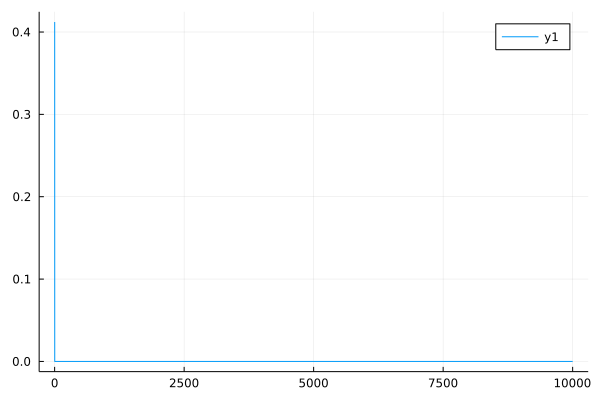

In [82]:
plot(samples)

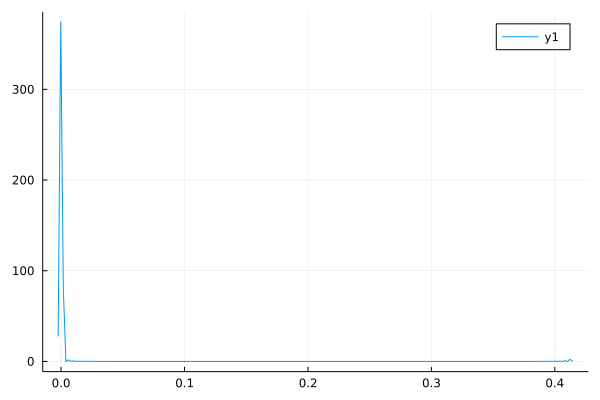

In [69]:
density(samples)

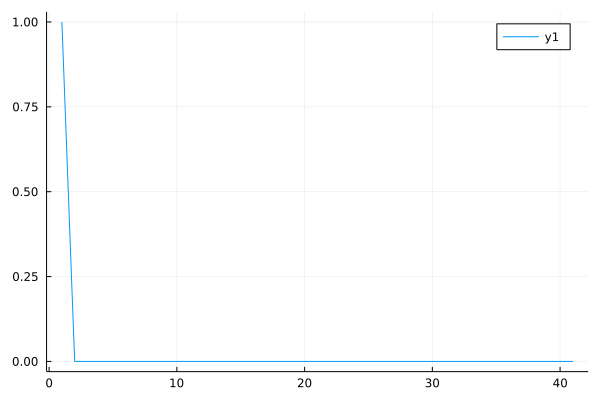

In [84]:
plot(autocor(samples))

# A3

The posterior distribution <br>
$\pi(\beta,\sigma^2|Y) \propto f(Y|\beta,\sigma^2)f(\beta|\sigma^2)f(\sigma^2)$<br>

$\displaystyle{f(\sigma^2)\propto \left(\frac{1}{\sigma^2}\right)^{-a+1} e^{\frac{-b}{\sigma^2}}}$<br>

$\displaystyle{f(\beta|\sigma^2)\propto \frac{1}{(\sigma^2I_p)^{1/2}} exp\left(-\frac{(\beta - \mu)^2}{2(\sigma I_p)^2}\right)}$<br>

$\displaystyle{f(Y|\beta,\sigma^2) \propto \frac{1}{(\sigma^2I_n)^{1/2}} exp\left(-\frac{(Y-X\beta)^2}{2(\sigma I_n)^2}\right)}$

$\displaystyle{\pi(\beta,\sigma^2|Y) \propto \frac{1}{(\sigma^2I_n)^{1/2}} exp\left(-\frac{(Y-X\beta)^2}{2(\sigma I_n)^2}\right) . \frac{1}{(\sigma^2I_p)^{1/2}} exp\left(-\frac{(\beta - \mu)^2}{2(\sigma I_p)^2}\right) . \left(\frac{1}{\sigma^2}\right)^{-a+1} e^{\frac{-b}{\sigma^2}}}$